In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import cv2
from sklearn.model_selection import train_test_split
import pickle
import os
import pandas as pd
import random
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
#We imported libraries that we need
#We used tensorflow for our project

In [3]:
path = r"C:\Users\90530\PycharmProjects\pythonProject2\TRafficSignClassifierDataSet"  #Our dataset path (TRaffic sign classes ) 
labelFile = 'TrafficSignss.csv'  # Our label file path (TRaffic signs labels)
batch_size_val = 50  
steps_per_epoch_val = 2000   # epoch parameters to train dataset
epochs_val = 30
imageDimesions = (32, 32, 3) #We defined all images dimension as same
testRatio = 0.3  # (# %70train, %30test)
validationRatio = 0.3  # if 1000 images 30% of remaining 700 will be 210 for validation

In [4]:
#We defined program criterias at here

In [5]:
count = 0
images = []
classNo = []
myList = os.listdir(path)
print("Total Classes Detected:", len(myList))
noOfClasses = len(myList)
print("Importing Classes.....")
for x in range(0, len(myList)):
    myPicList = os.listdir(path + "/" + str(count))
    for y in myPicList:
        curImg = cv2.imread(path + "/" + str(count) + "/" + y)
        images.append(curImg)
        classNo.append(count)
    print(count, end=" ")
    count += 1
print(" ")
images = np.array(images)
classNo = np.array(classNo)

Total Classes Detected: 53
Importing Classes.....
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52  


In [6]:
#We imported images at here

In [7]:
X_train, X_test, y_train, y_test = train_test_split(images, classNo, test_size=testRatio)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validationRatio)

In [8]:
#We splitted data as train, test and valid
#X_train= Array of images to train
#Y_train= Corresponding class ID

In [9]:
print(f'Total # of sample in whole dataset: {len(images)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in validation dataset: {len(X_validation)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 36929
Total # of sample in train dataset: 18095
Total # of sample in validation dataset: 7755
Total # of sample in test dataset: 11079


In [10]:
#We printed informations about splitting situation

In [11]:
print("Data Shapes")
print("Train", end="");
print(X_train.shape, y_train.shape)
print("Validation", end="");
print(X_validation.shape, y_validation.shape)
print("Test", end="");
print(X_test.shape, y_test.shape)
assert (X_train.shape[0] == y_train.shape[
    0]), "The number of images in not equal to the number of lables in training set"
assert (X_validation.shape[0] == y_validation.shape[
    0]), "The number of images in not equal to the number of lables in validation set"
assert (X_test.shape[0] == y_test.shape[0]), "The number of images in not equal to the number of lables in test set"
assert (X_train.shape[1:] == (imageDimesions)), " The dimesions of the Training images are wrong "
assert (X_validation.shape[1:] == (imageDimesions)), " The dimesionas of the Validation images are wrong "
assert (X_test.shape[1:] == (imageDimesions)), " The dimesionas of the Test images are wrong"

Data Shapes
Train(18095, 32, 32, 3) (18095,)
Validation(7755, 32, 32, 3) (7755,)
Test(11079, 32, 32, 3) (11079,)


In [12]:
#We printed shape of sets and checked compatibility problem for label and image dimension

In [13]:
data = pd.read_csv(labelFile, encoding="utf8")
print("data shape ", data.shape, type(data))

data shape  (53, 2) <class 'pandas.core.frame.DataFrame'>


In [14]:
#We read our label file

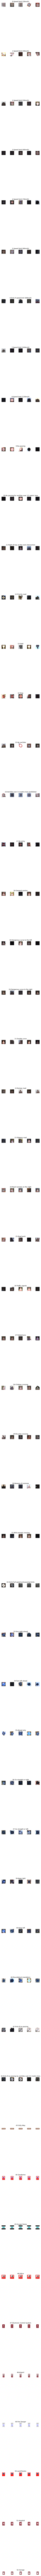

In [15]:
num_of_samples = []
cols = 5
num_classes = noOfClasses
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5, 300))
fig.tight_layout()
for i in range(cols):
    for j, row in data.iterrows():
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected) - 1), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j) + "-" + row["Name"])
            num_of_samples.append(len(x_selected))

In [16]:
#We displayed our TRaffic sign classifier labels and some examples for each one.

[90, 968, 985, 594, 845, 792, 185, 633, 641, 652, 880, 565, 960, 914, 329, 258, 173, 499, 540, 80, 141, 123, 161, 231, 118, 643, 279, 109, 245, 109, 189, 324, 97, 281, 176, 521, 163, 93, 941, 149, 137, 107, 105, 100, 106, 105, 105, 97, 119, 95, 102, 129, 112]


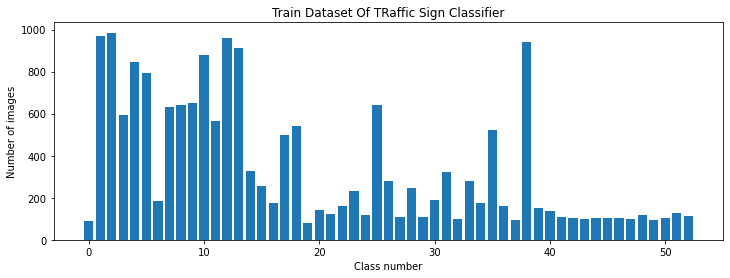

In [17]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Train Dataset Of TRaffic Sign Classifier")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

In [18]:
#We printed image numbers for all sign classes and visualized their distrubition with using graph.

In [19]:
def grayscale(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img


def equalize(img):
    img = cv2.equalizeHist(img)
    return img


def preprocessing(img):
    img = grayscale(img)  # We converted images to grayscale
    img = equalize(img)  # We standardized the lighting in an image
    img = img / 255  # We Normalized values between 0 and 1 instead of 0 to 255
    return img

In [20]:
#We defined function to prepare images for preprocessing

In [21]:
X_train = np.array(list(map(preprocessing, X_train))) 
X_validation = np.array(list(map(preprocessing, X_validation)))
X_test = np.array(list(map(preprocessing, X_test)))

In [22]:
#We tagged and preprocessed all images

In [23]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_validation = X_validation.reshape(X_validation.shape[0], X_validation.shape[1], X_validation.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

In [24]:
#We added depth of first image to all images

In [25]:
dataGen = ImageDataGenerator(width_shift_range=0.1,
                             height_shift_range=0.1,
                             zoom_range=0.2,  
                             shear_range=0.1, 
                             rotation_range=10)  
dataGen.fit(X_train)
batches = dataGen.flow(X_train, y_train,
                       batch_size=20)  
X_batch, y_batch = next(batches)

In [26]:
#We made augmentation of images to make them more generic

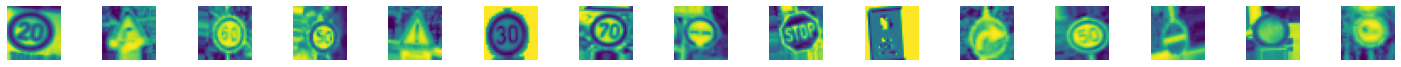

In [27]:
fig, axs = plt.subplots(1, 15, figsize=(20, 5))
fig.tight_layout()

for i in range(15):
    axs[i].imshow(X_batch[i].reshape(imageDimesions[0], imageDimesions[1]))
    axs[i].axis('off')
plt.show()

y_train = to_categorical(y_train, noOfClasses)
y_validation = to_categorical(y_validation, noOfClasses)
y_test = to_categorical(y_test, noOfClasses)

In [28]:
#We reshaped images according to augmentation

In [29]:
def myModel():
    no_Of_Filters = 60
    size_of_Filter = (5, 5)  
    size_of_Filter2 = (3, 3)
    size_of_pool = (2, 2) 
    no_Of_Nodes = 500  
    model = Sequential()
    model.add((Conv2D(no_Of_Filters, size_of_Filter, input_shape=(imageDimesions[0], imageDimesions[1], 1),
                      activation='relu')))  
    model.add((Conv2D(no_Of_Filters, size_of_Filter, activation='relu')))
    model.add(MaxPooling2D(pool_size=size_of_pool))  

    model.add((Conv2D(no_Of_Filters // 2, size_of_Filter2, activation='relu')))
    model.add((Conv2D(no_Of_Filters // 2, size_of_Filter2, activation='relu')))
    model.add(MaxPooling2D(pool_size=size_of_pool))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(no_Of_Nodes, activation='relu'))
    model.add(Dropout(0.5)) 
    model.add(Dense(noOfClasses, activation='softmax'))  
    
    model.compile(Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [30]:
#We created a CNN model

In [31]:
model = myModel()
print(model.summary())
history = model.fit_generator(dataGen.flow(X_train, y_train, batch_size=batch_size_val),
                              steps_per_epoch=steps_per_epoch_val, epochs=epochs_val,
                              validation_data=(X_validation, y_validation), shuffle=1)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 30)          8130      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 30)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 30)         

In [32]:
#We compiled our model

In [33]:
best_model_accuracy = history.history['accuracy'][np.argmin(history.history['loss'])]
print(best_model_accuracy)

0.97472495


In [34]:
#We learned our model's accuracy in all epoch steps

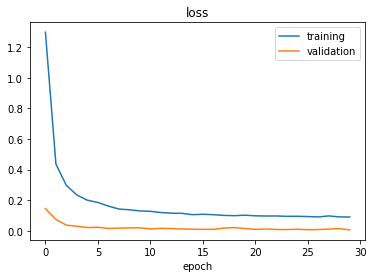

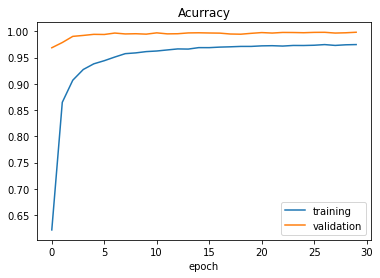

Test Score: 0.012147092256630484
Test Accuracy: 0.9975629448890686


-1

In [35]:
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('loss')
plt.xlabel('epoch')
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.title('Acurracy')
plt.xlabel('epoch')
plt.show()
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Score:', score[0])
print('Test Accuracy:', score[1])

pickle_out = open("model_trained.p7", "wb") 
pickle.dump(model, pickle_out)
pickle_out.close()
cv2.waitKey(0)

In [36]:
#We visualized accuracy and loss graph of training and validation sets 
#We printed our model's test score and model's test accuracy 

In [37]:
import numpy as np
import cv2
import pickle

In [38]:
#We imported libraries that we need for live testing

In [39]:
frameWidth = 640  
frameHeight = 480
brightness = 180
threshold = 0.75  
font = cv2.FONT_HERSHEY_SIMPLEX

In [40]:
#We made camera settings

In [41]:
cap = cv2.VideoCapture(0)
cap.set(3, frameWidth)
cap.set(4, frameHeight)
cap.set(10, brightness)
pickle_in = open("model_trained.p7", "rb")
model = pickle.load(pickle_in)

In [42]:
#We imported our trained model and camera setup

In [43]:
def grayscale(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img


def equalize(img):
    img = cv2.equalizeHist(img)
    return img


def preprocessing(img):
    img = grayscale(img)
    img = equalize(img)
    img = img / 255
    return img


def getCalssName(classNo):
    if classNo == 0:
        return 'Hız Limiti (20 km/h)'
    elif classNo == 1:
        return 'Hız Limiti (30 km/h)'
    elif classNo == 2:
        return 'Hız Limiti (50 km/h)'
    elif classNo == 3:
        return 'Hız Limiti (60 km/h)'
    elif classNo == 4:
        return 'Hız Limiti (70 km/h)'
    elif classNo == 5:
        return 'Hız Limiti (80 km/h)'
    elif classNo == 6:
        return 'Hız Limiti Sonu (80 km/h)'
    elif classNo == 7:
        return 'Hız Limiti (100 km/h)'
    elif classNo == 8:
        return 'Hız Limiti (120 km/h)'
    elif classNo == 9:
        return 'Geçiş Yok'
    elif classNo == 10:
        return '3.5 Metreden Uzun Araçlar Için Geçiş Yok'
    elif classNo == 11:
        return 'Bir Sonraki Kavşakta Geçiş Hakkı'
    elif classNo == 12:
        return 'Öncelikli Yol'
    elif classNo == 13:
        return 'Yol Ver'
    elif classNo == 14:
        return 'Dur'
    elif classNo == 15:
        return 'Hiçbir Araç Geçemez'
    elif classNo == 16:
        return '3.5 Metreden Uzun Araçlar Yasaklandı'
    elif classNo == 17:
        return 'Giriş Yok'
    elif classNo == 18:
        return 'Genel Uyarı'
    elif classNo == 19:
        return 'Sola Tehlikeli Dönüş'
    elif classNo == 20:
        return 'Sağa Tehlikeli Dönüş'
    elif classNo == 21:
        return 'Tehlikeli Devamlı Virajlar'
    elif classNo == 22:
        return 'Kasisli Yol'
    elif classNo == 23:
        return 'Kaygan Yol'
    elif classNo == 24:
        return 'Sağdan Daralan Kaplama'
    elif classNo == 25:
        return 'Yol Çlışması'
    elif classNo == 26:
        return 'Trafik İşaretleri'
    elif classNo == 27:
        return 'Yayalar'
    elif classNo == 28:
        return 'Çocuk Geçidi'
    elif classNo == 29:
        return 'Bisiklet Geçidi'
    elif classNo == 30:
        return 'Buzlanma'
    elif classNo == 31:
        return 'Yabani Hayvan Çıkabilir'
    elif classNo == 32:
        return 'Bütün Hız ve Geçme Limitlerinin Sonu'
    elif classNo == 33:
        return 'Sağa Mecburi Dön'
    elif classNo == 34:
        return 'Sola Mecburi Yön'
    elif classNo == 35:
        return 'Düz Mecburi Yön'
    elif classNo == 36:
        return 'Düz Git Ya Da Sağa Dön'
    elif classNo == 37:
        return 'Düz Git Ya Da Sola Dön'
    elif classNo == 38:
        return 'Sağdan Devam Et'
    elif classNo == 39:
        return 'Soldan Devam Et'
    elif classNo == 40:
        return 'Ada Etrafından Dön'
    elif classNo == 41:
        return 'Geçme Limitinin Sonu'
    elif classNo == 42:
        return '3.5 Metreden Uzun Araçlar Için Geçiş Yasaklarının Sonu'
    elif classNo == 43:
        return 'Tek Yon'
    elif classNo == 44:
        return 'Jandarma'
    elif classNo == 45:
        return 'Kaçış Rampası'
    elif classNo == 46:
        return 'Polis'
    elif classNo == 47:
        return 'Elektronik Denetim Sistemi'
    elif classNo == 48:
        return 'Tünel'
    elif classNo == 49:
        return 'Yaya Bölgesi'
    elif classNo == 50:
        return 'Kara Yolları'
    elif classNo == 51:
        return 'Hastane'
    elif classNo == 52:
        return 'Tamirhane'
   

In [44]:
#We again preprocessed images and gave Turkish corresponding tag to all classes
#Lastly, we read trained model, created a probability indicator and compiled live prediction setup

In [ ]:
while True:

    success, imgOrignal = cap.read()

    img = np.asarray(imgOrignal)
    img = cv2.resize(img, (32, 32))
    img = preprocessing(img)
    cv2.imshow("Processed Image", img)
    img = img.reshape(1, 32, 32, 1)
    cv2.putText(imgOrignal, "CLASS: ", (20, 35), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
    cv2.putText(imgOrignal, "PROBABILITY: ", (20, 75), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)

    predictions = model.predict(img)
    classIndex = model.predict_classes(img)
    probabilityValue = np.amax(predictions)
    if probabilityValue > threshold:

        cv2.putText(imgOrignal, str(classIndex) + " " + str(getCalssName(classIndex)), (120, 35), font, 0.75, (0, 0, 255), 2,
                    cv2.LINE_AA)
        cv2.putText(imgOrignal, str(round(probabilityValue * 100, 2)) + "%", (180, 75), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
    cv2.imshow("Result", imgOrignal)

    if cv2.waitKey(1) and 0xFF == ord('q'):
        break